In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy
from matplotlib.patches import Rectangle

In [50]:
folder_names = ['balanced_5fps_720_refl',
                'new_network_no_weights_1fps_250',
                'new_network_no_weights_refl_1fps_250',
                'new_network_inv_weights_1fps_250',
                'new_network_inv_weights_refl_1fps_250',
                'new_nn_inv_weights_refl_1fps_250_fold2',
                'new_nn_inv_weights_refl_1fps_250_fold3',
                'new_nn_inv_weights_refl_1fps_250_fold4',
                'new_nn_inv_weights_refl_1fps_250_fold5',
                'new_network_adj_weights_1fps_250',
                'new_network_adj_weights_refl_1fps_250',
                'original_run_no_weights',
                'original_run_no_weights_no_dropout',
                'original_runs_inv_weights',
                'original_runs_inv_weights_no_dropout',
                'original_runs_adj_weights',
                'original_runs_adj_weights_no_dropout',
                'rLSTM_batch20_intprop_ear_1fp250',
                'rLSTM_batch30_intprop_ear_1fp250_fold1',
                'rLSTM_batch30_intprop_ear_1fp250_fold2',
                'rLSTM_batch30_intprop_ear_1fp250_fold3',
                'rLSTM_batch30_intprop_ear_1fp250_fold4',
                'rLSTM_batch30_intprop_ear_1fp250_fold5',
                'rLSTM_batch40_intprop_ear_1fp250',
                'rLSTM_batch50_intprop_ear_1fp250',
                'rLSTM_batch100_intprop_ear_1fp250',
                'rLSTM_batch5_intprop_ear_1fp250_fold1',
                'rLSTM_batch5_intprop_ear_1fp250_fold2',
                'rLSTM_batch5_intprop_ear_1fp250_fold3',
                'rLSTM_batch5_intprop_ear_1fp250_fold4',
                'rLSTM_batch5_intprop_ear_1fp250_fold5',
               ]

### Confusion matrix function

In [24]:
def save_confusion_matrix_plot(saving_path, final_results_folder, folder_name, weight_type):
    filename = f'predictions_vs_actuals_{weight_type}_model.csv'
    df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, filename))
    y_actual = df['Actuals']
    y_pred = df['Predictions']
    cmatrix = confusion_matrix(y_actual, y_pred, labels=[0, 1, 2, 3, 4])
    row_sums = cmatrix.sum(axis=1, keepdims=True)
    cmatrix_percentage = cmatrix / row_sums 
    cmatrix_percentage *= 100
    annotated_matrix = np.vectorize(lambda x: f'{x:.1f}%')(cmatrix_percentage)
    fig, ax = plt.subplots()
    sns.heatmap(cmatrix_percentage, annot=annotated_matrix, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['debulk', 'medial', 'inferior', 'superior', 'lateral'])
    ax.yaxis.set_ticklabels(['debulk', 'medial', 'inferior', 'superior', 'lateral'])
    plt.savefig(os.path.join(saving_path, final_results_folder, folder_name, f'perc_confusion_matrix_{weight_type}.png'))

/var/folders/_x/qj3jqz3111x0t0l3nqdb9k6r0000gp/T/ipykernel_30392/3272042769.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


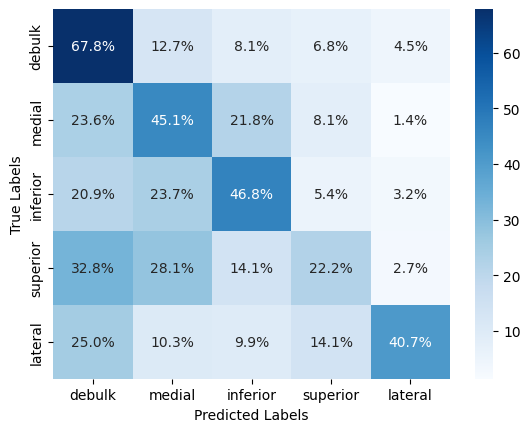

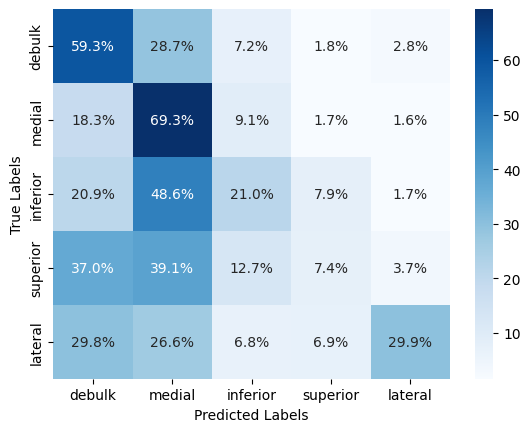

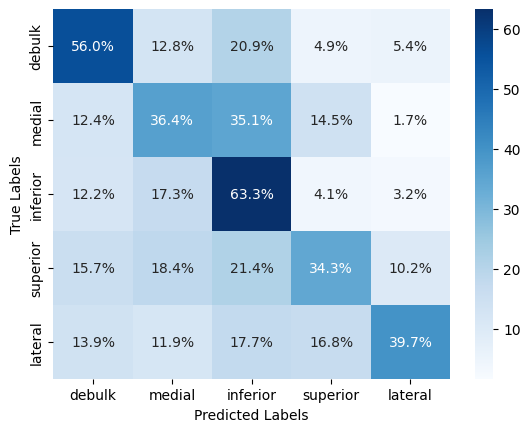

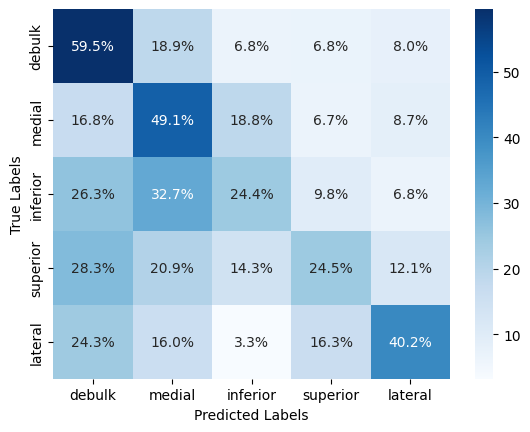

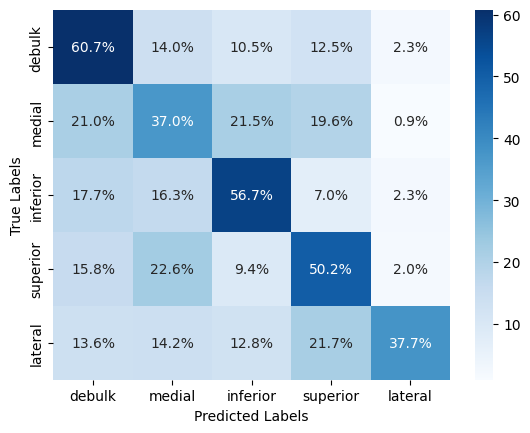

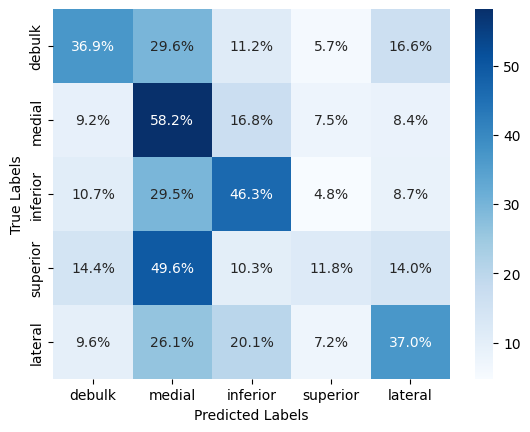

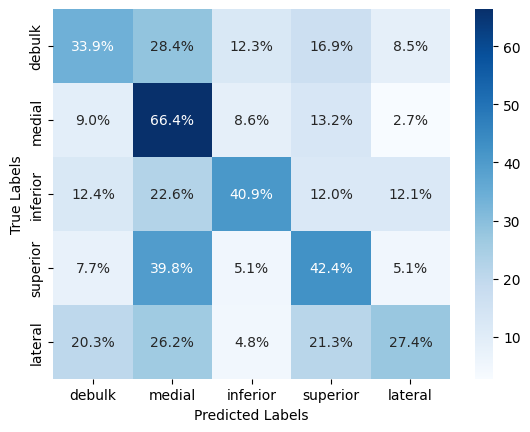

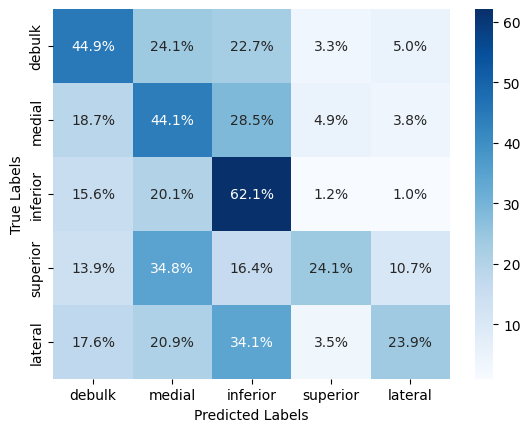

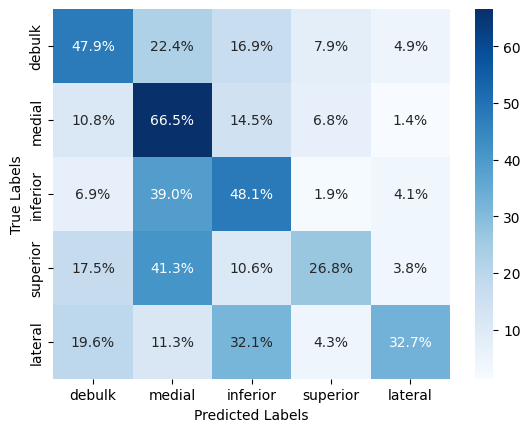

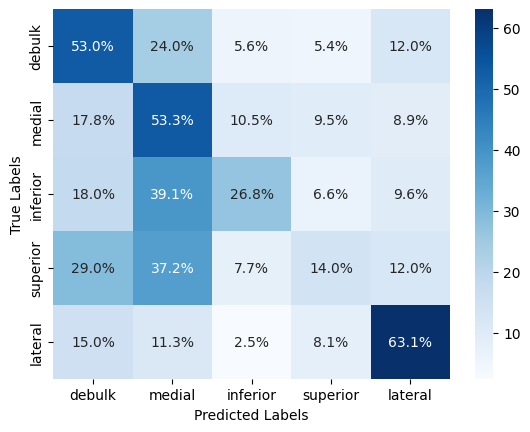

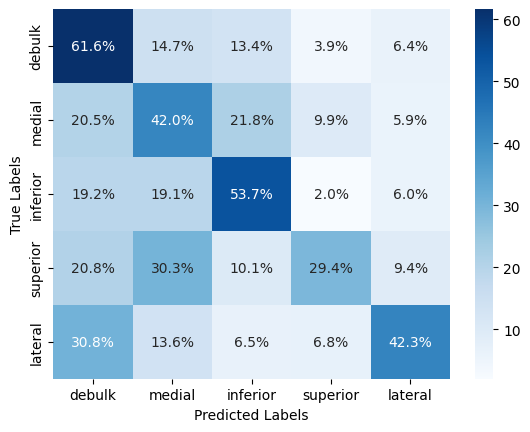

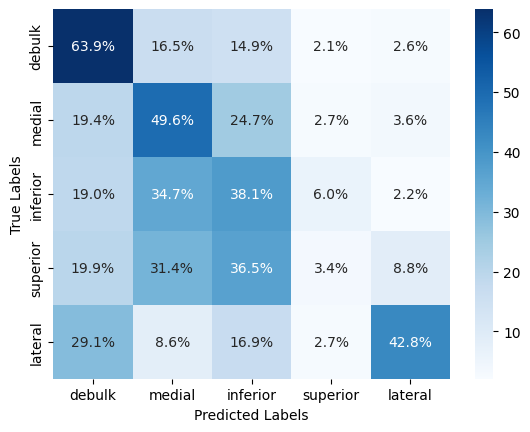

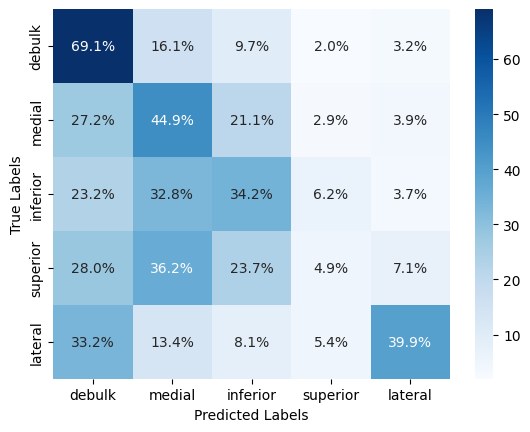

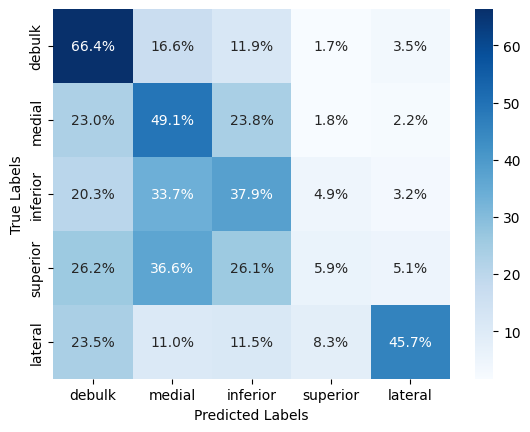

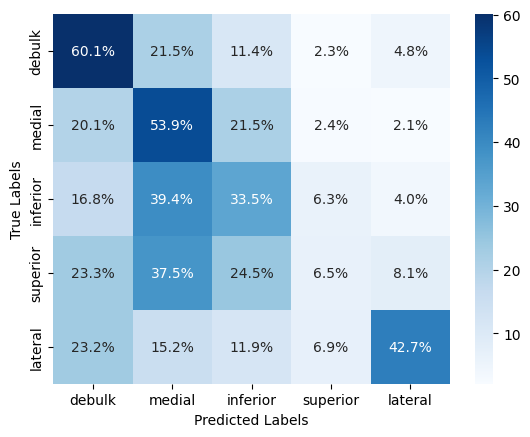

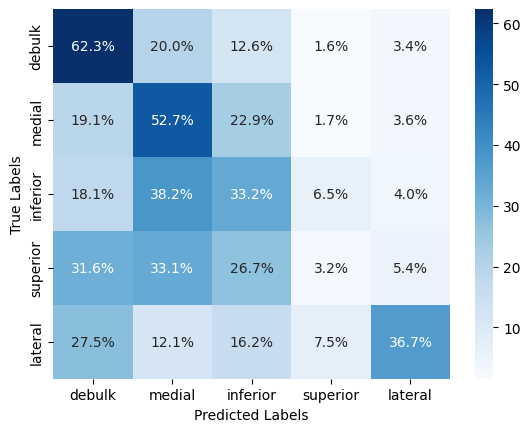

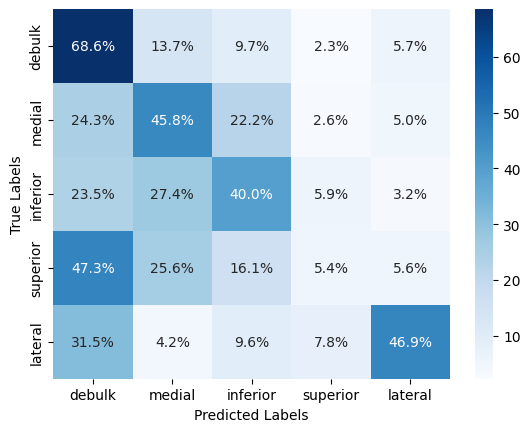

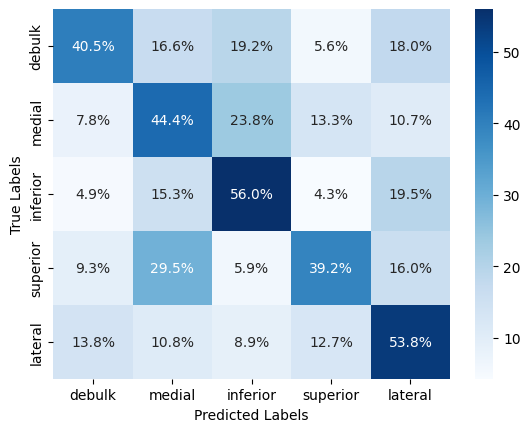

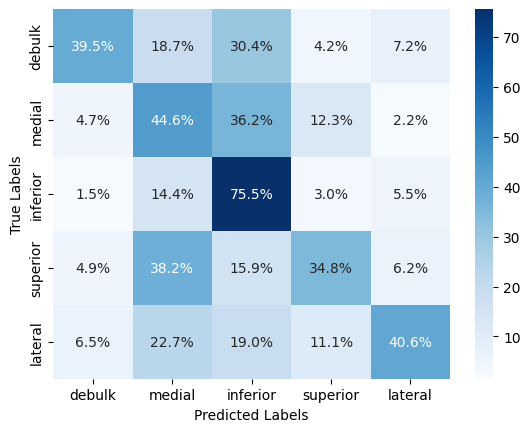

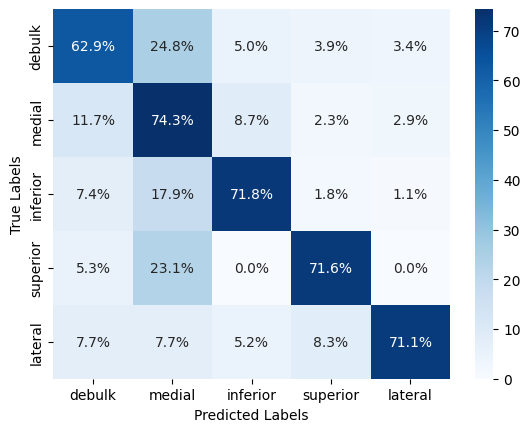

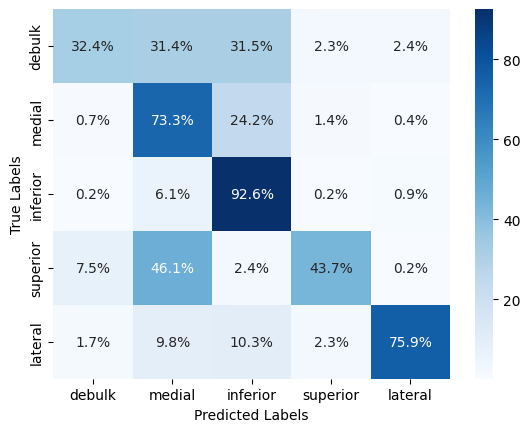

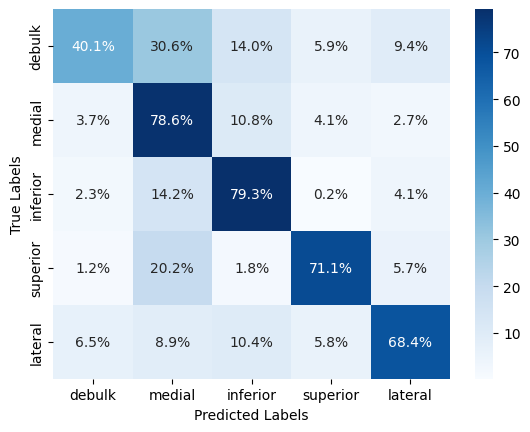

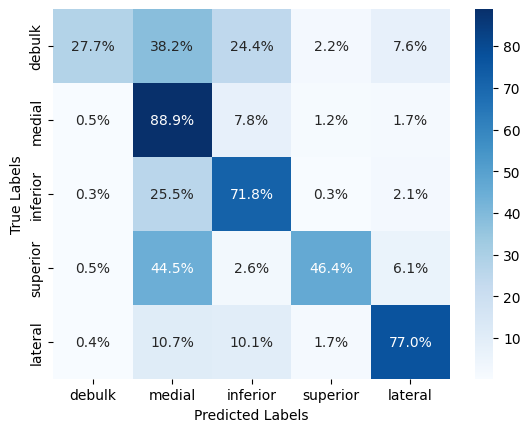

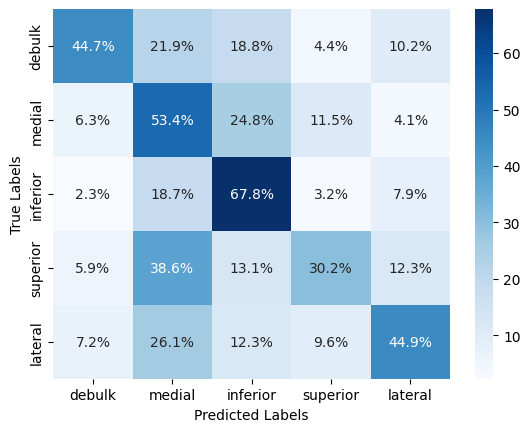

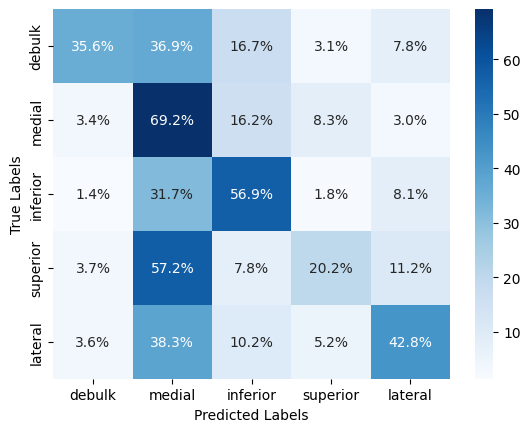

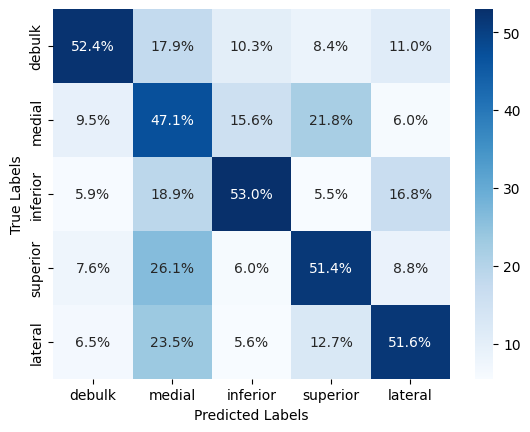

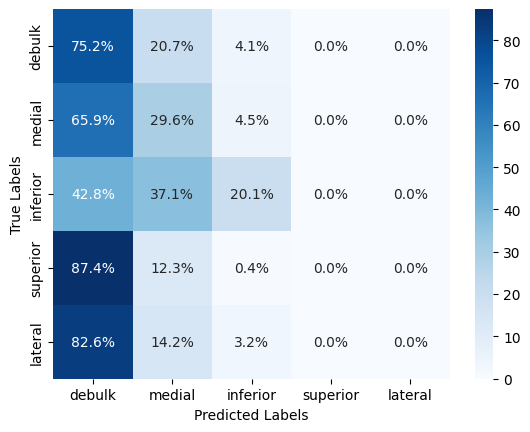

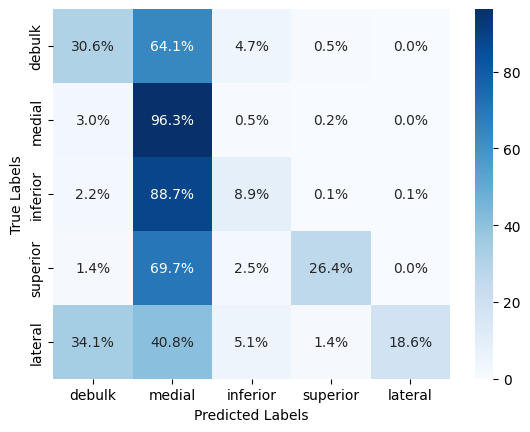

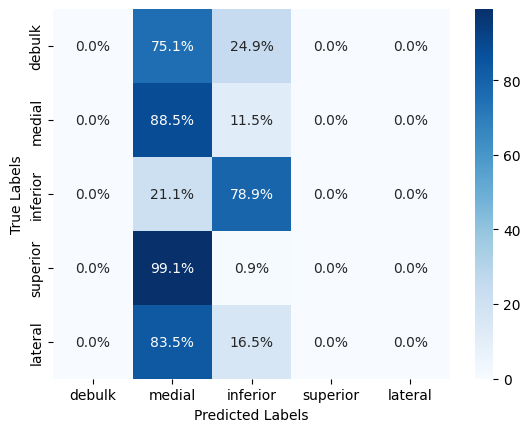

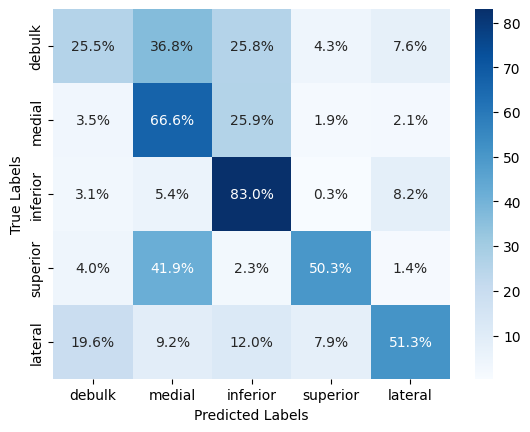

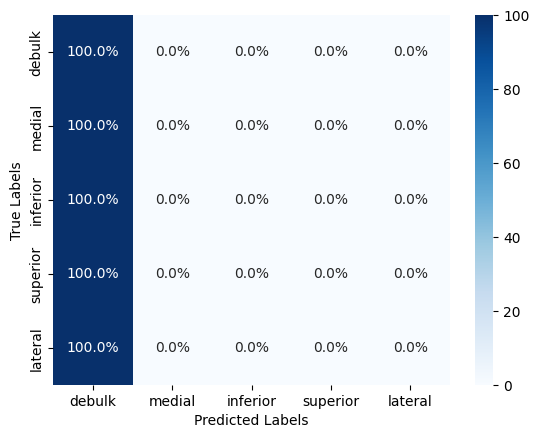

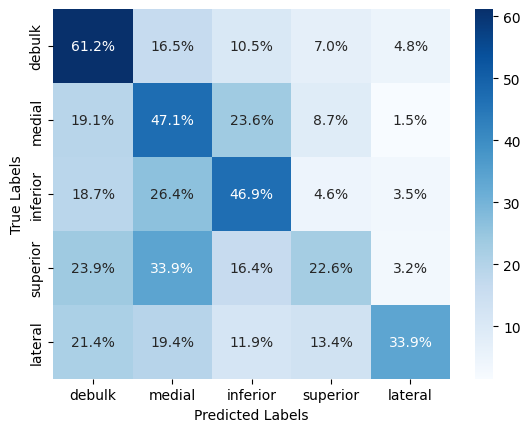

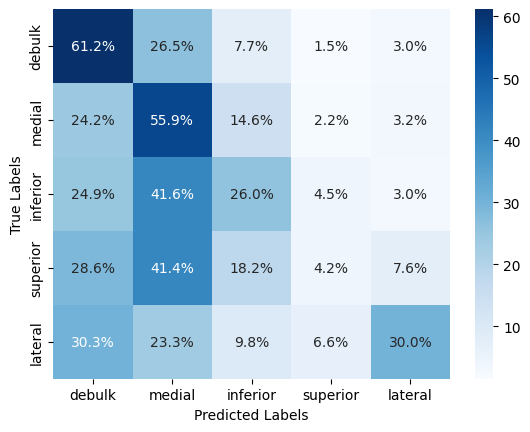

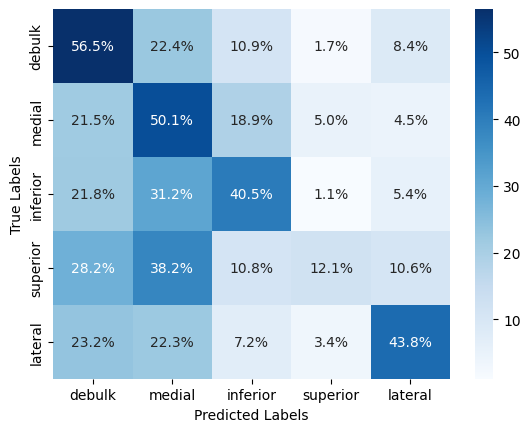

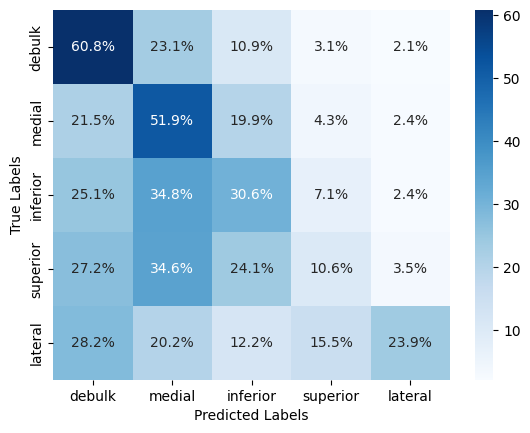

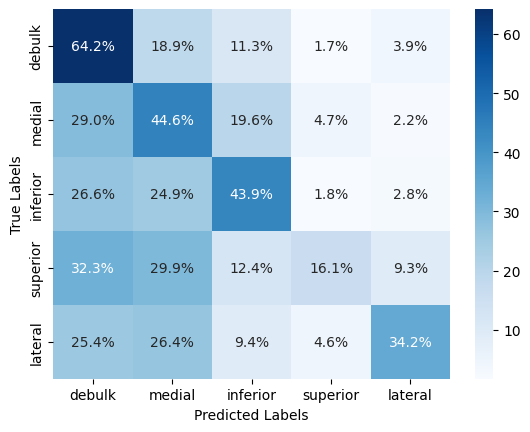

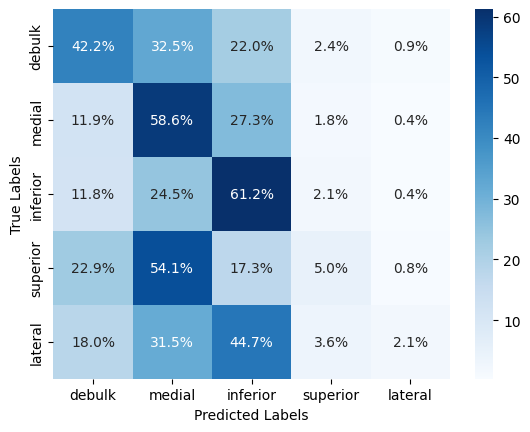

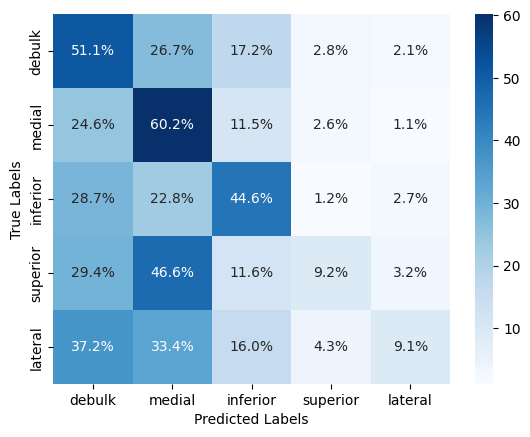

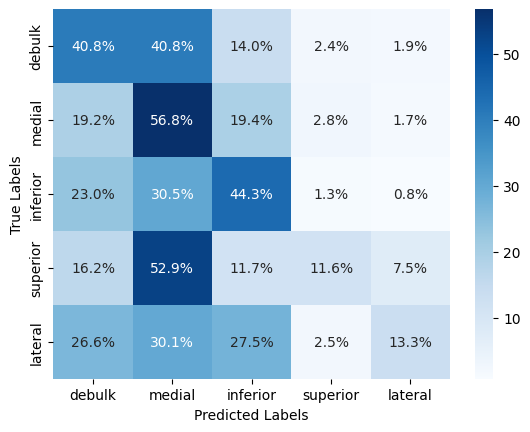

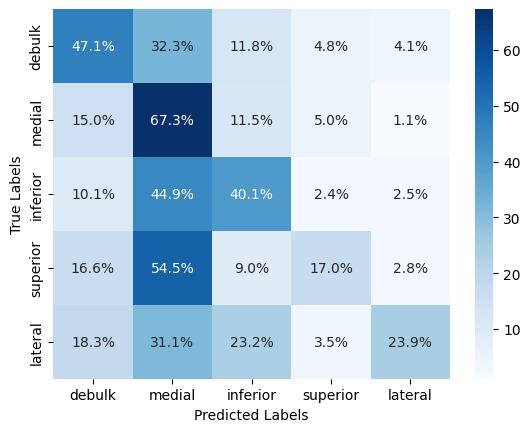

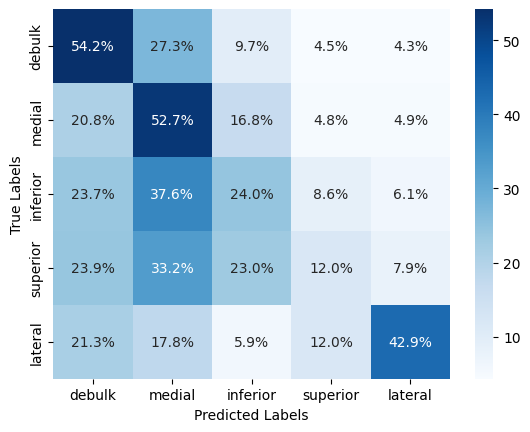

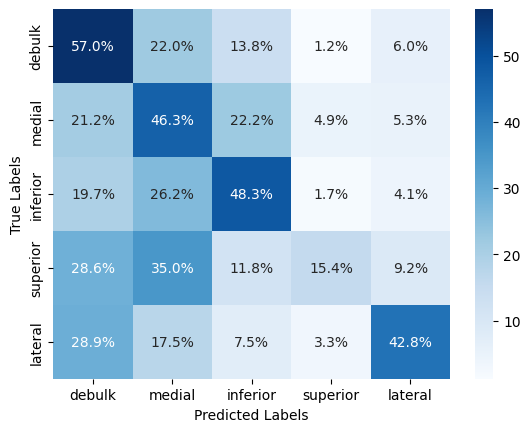

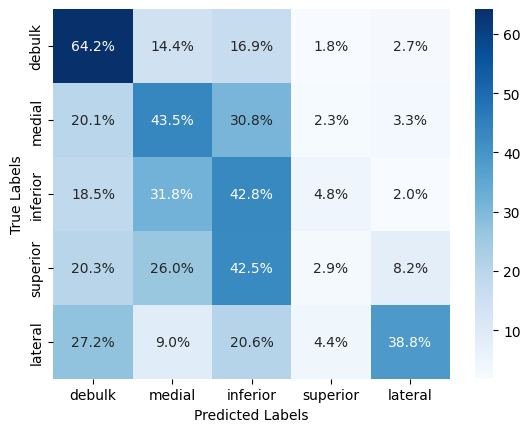

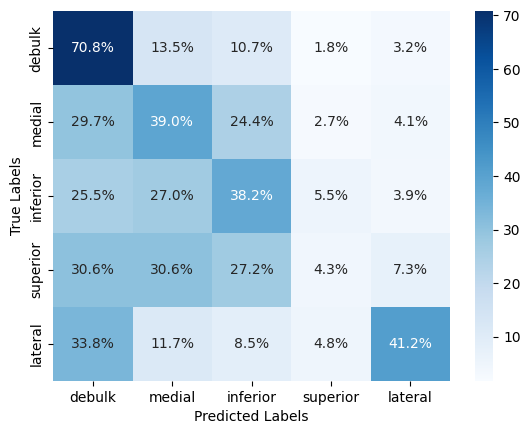

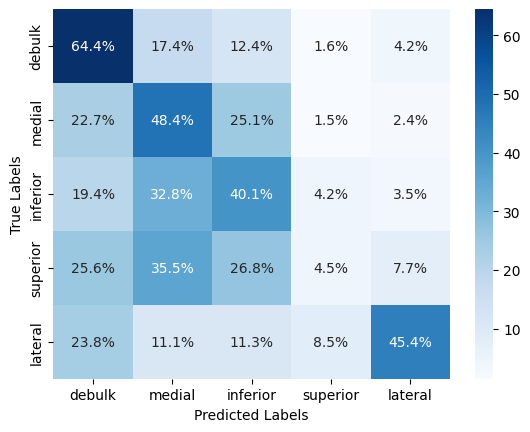

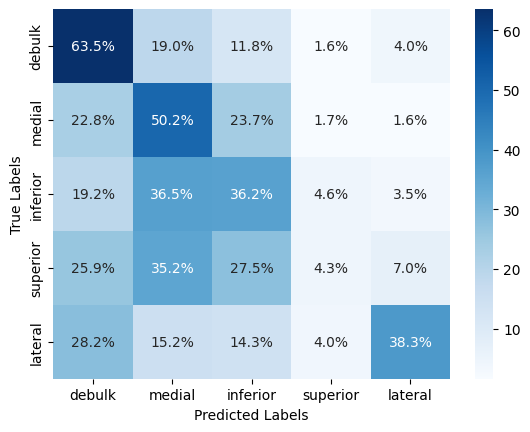

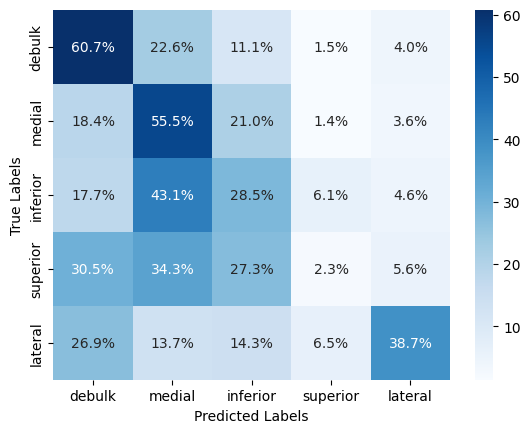

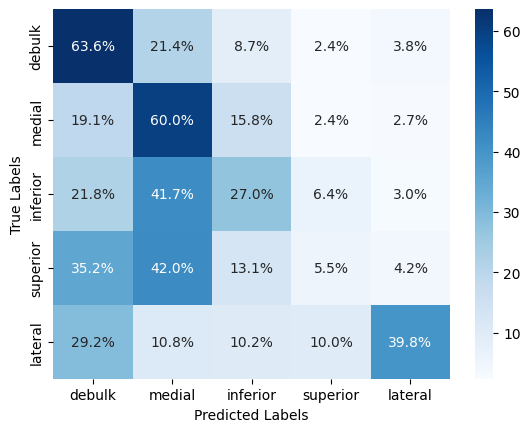

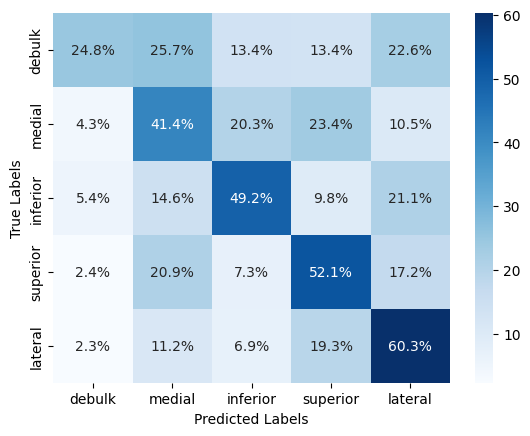

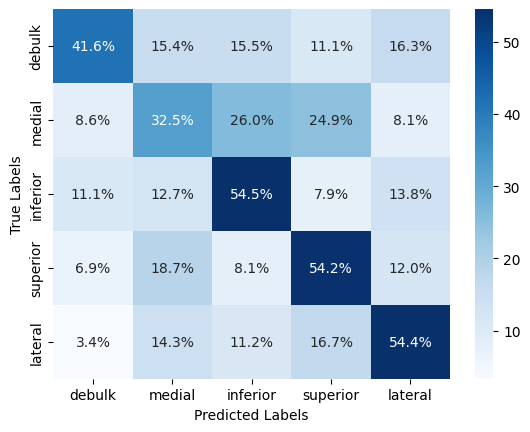

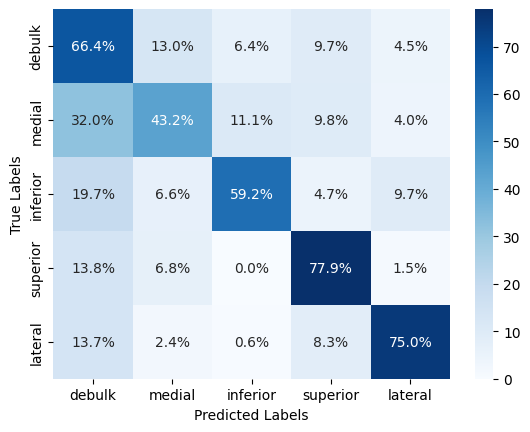

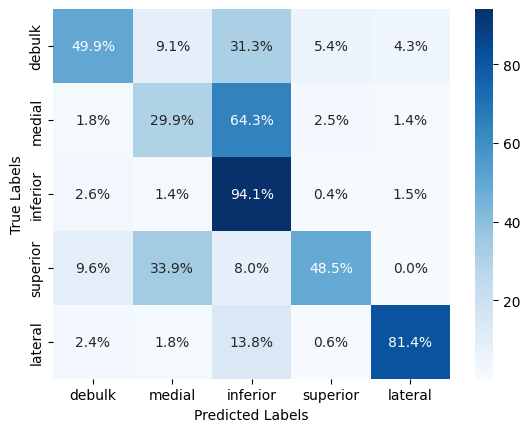

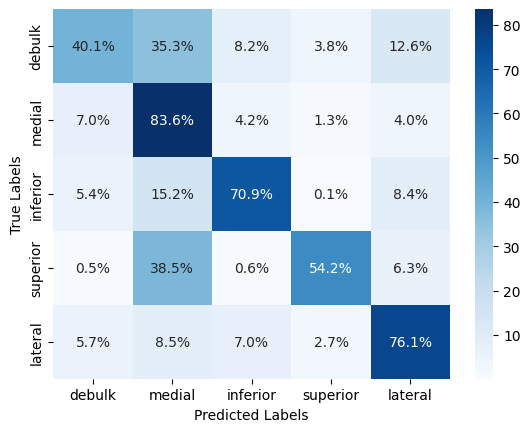

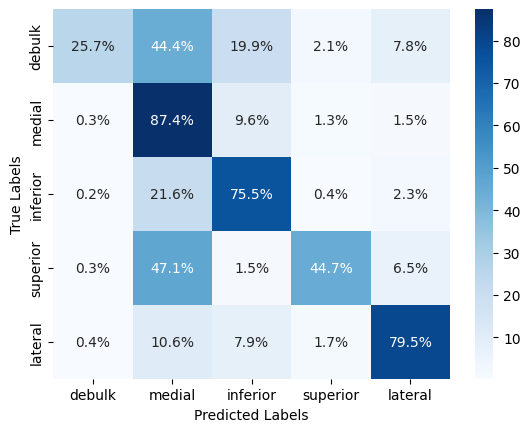

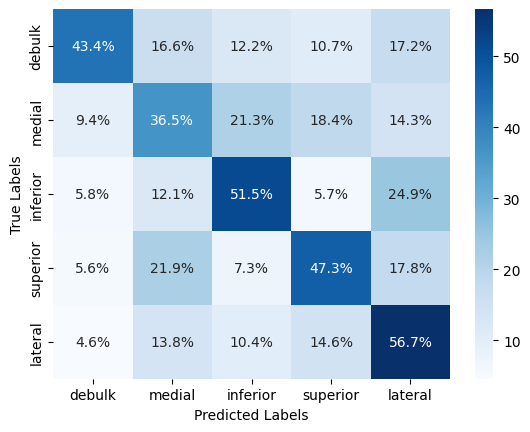

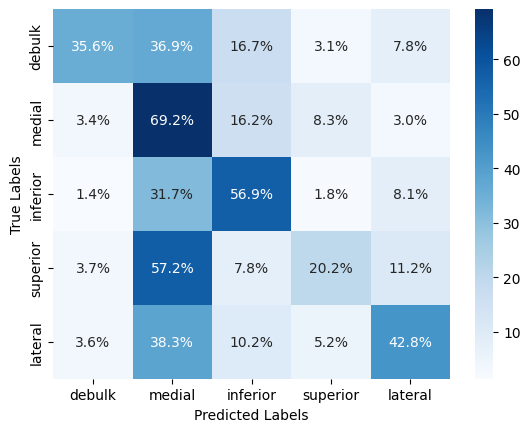

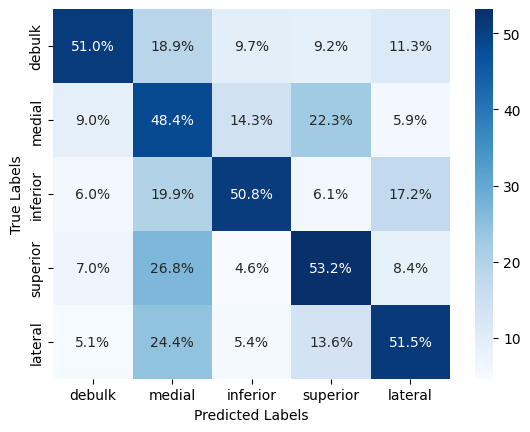

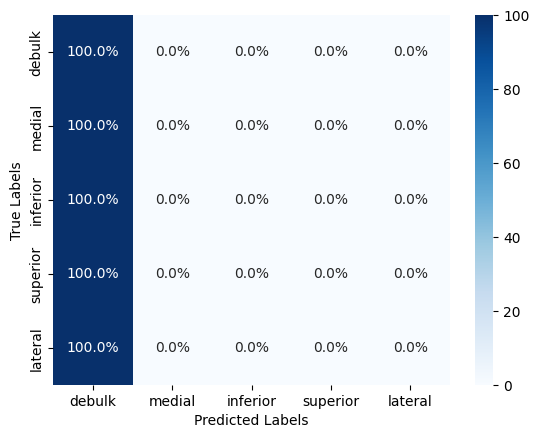

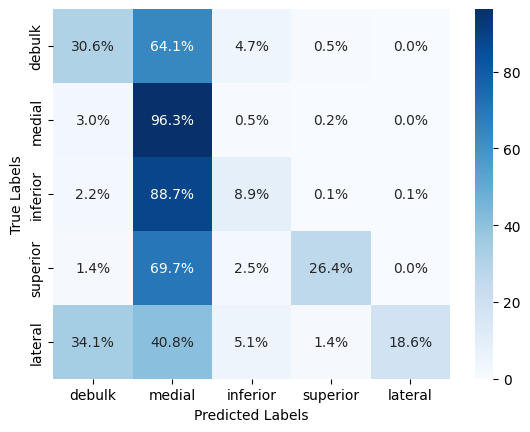

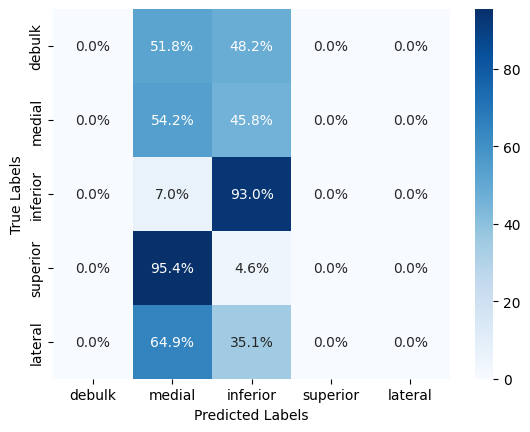

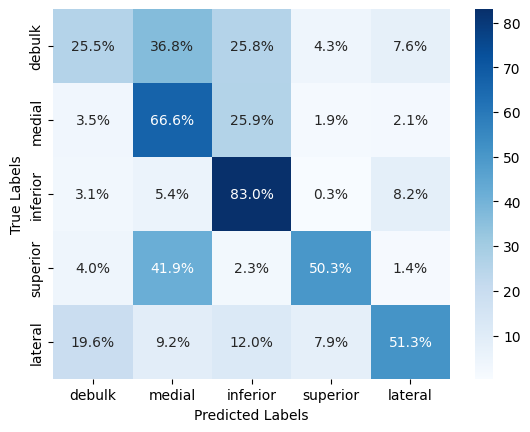

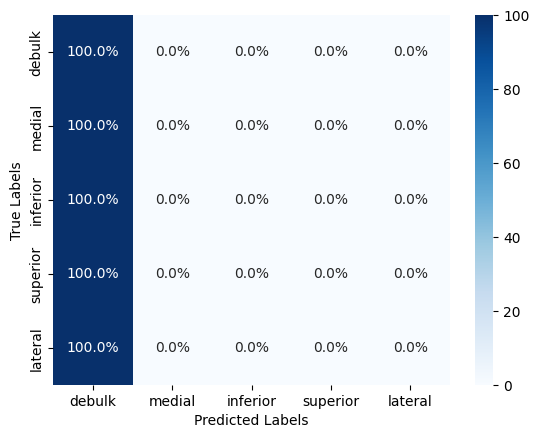

In [31]:
saving_path = '/Users/dorotheeduvaux 1/UCL CSML/MSc Project'
final_results_folder = 'FinalResults'

for weight_type in ['best', 'last']:
    for folder_name in folder_names:
        save_confusion_matrix_plot(saving_path, final_results_folder, folder_name, weight_type)

### Table of metrics

In [165]:
def create_metrics_tables(saving_path,  final_results_folder, folder_name, weight_type):
    steps_metrics_filename = f'metrics_results_{weight_type}_model.csv'
    overall_results_filename = f'results_df_{weight_type}_model.csv'
    steps_df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, steps_metrics_filename))
    overall_df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, overall_results_filename))

    steps_df = steps_df.rename(columns={'Categories':'Steps'})
    value_map = {'tumour_debulking': 'tumour debulking', 
                 'dissection_medial': 'dissection medial', 
                 'dissection_inferior': 'dissection inferior',
                 'dissection_superior': 'dissection superior',
                 'dissection_lateral': 'dissection lateral',
                }
    steps_df['Steps'] = steps_df['Steps'].map(value_map)
    steps_df = steps_df[['Steps', 'F1', 'Precision', 'Recall']]
    steps_latex = steps_df.to_latex(index=False, float_format="%.3f")
    with open(os.path.join(saving_path, final_results_folder, folder_name, f'steps_metrics_{weight_type}.tex'), 'w') as f:
        f.write(steps_latex)

    overall_df['Run'] = folder_name.replace('_', ' ')
    overall_df = overall_df.rename(columns={'Unnamed: 0': 'Metric'})
    overall_df = overall_df.pivot(index='Run', columns='Metric', values='Value')
    overall_df = overall_df.reset_index()
    overall_df = overall_df[['Run', 'Weighted average F1', 'Overall accuracy', 'Weighted average precision', 'Weighted average recall']]
    overall_latex = overall_df.to_latex(index=False, float_format="%.3f")
    print(overall_latex)
    with open(os.path.join(saving_path, final_results_folder, folder_name, f'overall_metrics_{weight_type}.tex'), 'w') as f:
        f.write(overall_latex)

In [166]:
saving_path = '/Users/dorotheeduvaux 1/UCL CSML/MSc Project'
final_results_folder = 'FinalResults'

for weight_type in ['best', 'last']:
    for folder_name in folder_names:
        create_metrics_tables(saving_path, final_results_folder, folder_name, weight_type)

\begin{tabular}{lrrrr}
\toprule
Run & Weighted average F1 & Overall accuracy & Weighted average precision & Weighted average recall \\
\midrule
balanced 5fps 720 refl & 0.439 & 0.445 & 0.481 & 0.445 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
Run & Weighted average F1 & Overall accuracy & Weighted average precision & Weighted average recall \\
\midrule
new network no weights 1fps 250 & 0.409 & 0.441 & 0.440 & 0.441 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
Run & Weighted average F1 & Overall accuracy & Weighted average precision & Weighted average recall \\
\midrule
new network no weights refl 1fps 250 & 0.468 & 0.472 & 0.489 & 0.472 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
Run & Weighted average F1 & Overall accuracy & Weighted average precision & Weighted average recall \\
\midrule
new network inv weights 1fps 250 & 0.408 & 0.416 & 0.414 & 0.416 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
Run & Weighted aver

### Training and validation predictions

In [3]:
def plot_shaded_predictions(predictions_df, file_path):
    predictions = predictions_df['Predictions']  
    actuals = predictions_df['Actuals']  
    colors = {
        0: 'blue', 
        1: 'green', 
        2: 'red', 
        3: 'skyblue', 
        4: 'orange', 
    }
    fig, axs = plt.subplots(2, 1, figsize=(8, 2), sharex=True)
    # Plot predictions
    for i, value in enumerate(predictions):
        axs[0].add_patch(Rectangle((i, 0), 1, 1, color=colors.get(value, 'other')))
    # Plot actuals
    for i, value in enumerate(actuals):
        axs[1].add_patch(Rectangle((i, 0), 1, 1, color=colors.get(value, 'other')))
    # Setting the limits of the plot and other aesthetic settings
    for ax in axs:
        ax.set_xlim(0, max(len(predictions), len(actuals)))
        ax.set_ylim(0, 1)
        ax.yaxis.set_visible(False)
    # Adding a title
    axs[0].set_title('Predictions')
    axs[1].set_title('Actuals')
    plt.tight_layout()
    plt.savefig(file_path)

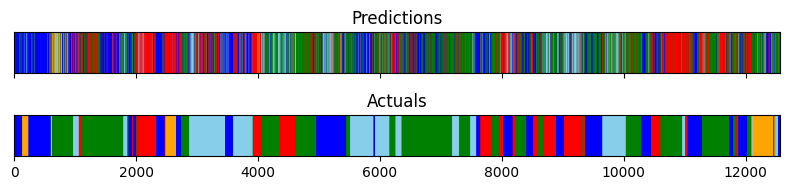

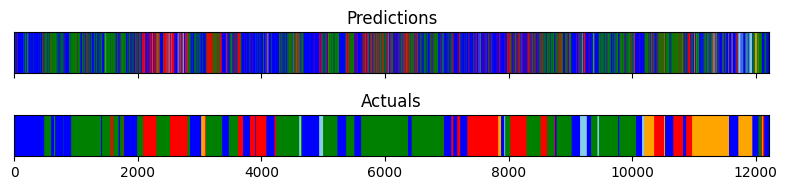

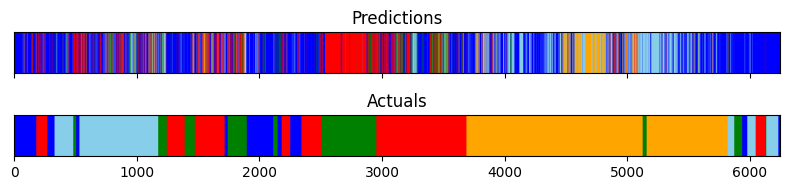

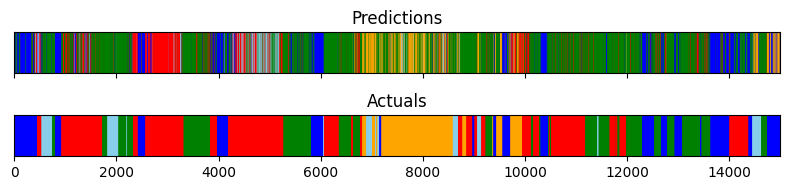

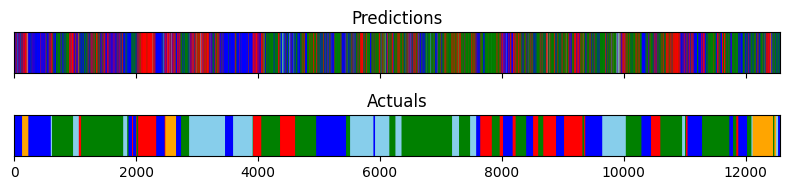

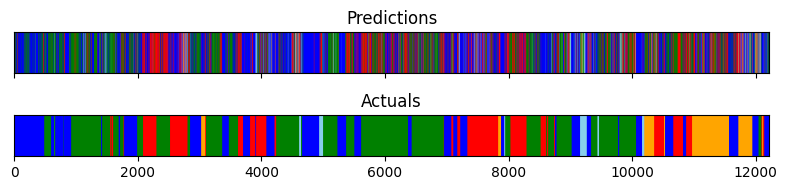

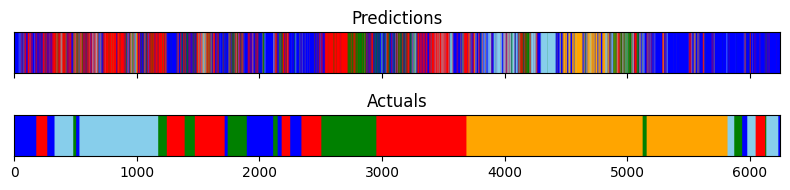

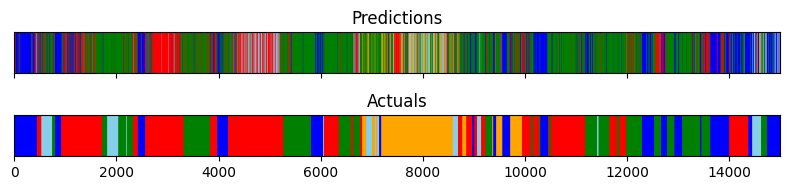

In [4]:
saving_path = '/Users/dorotheeduvaux 1/UCL CSML/MSc Project'
final_results_folder = 'FinalResults'


folder_names = ['new_network_inv_weights_1fps_250',
                # 'new_network_inv_weights_refl_1fps_250',
                # 'rLSTM_batch30_intprop_ear_1fp250_fold1',
               ]

for weight_type in ['best', 'last']:
    for folder_name in folder_names:
        # plot for first 2 training videos only
        # video_ids = [1, 2]
        # for video_id in video_ids:
        #     filename = f'training_predictions_{weight_type}.csv'
        #     training_predictions_df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, filename))
        #     predictions_df = training_predictions_df[training_predictions_df['Video_ids'] == video_id]
        #     file_path = os.path.join(saving_path, final_results_folder, folder_name, f'training_shaded_plot_video{video_id}_{weight_type}.png')
        #     plot_shaded_predictions(predictions_df, file_path)
    
        filename = f'validation_predictions_{weight_type}.csv'
        validation_predictions_df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, filename))
        video_ids = validation_predictions_df['Video_ids'].unique()
        for video_id in video_ids:
            predictions_df = validation_predictions_df[validation_predictions_df['Video_ids'] == video_id]
            file_path = os.path.join(saving_path, final_results_folder, folder_name, f'validation_shaded_plot_video{video_id}_{weight_type}.png')
            plot_shaded_predictions(predictions_df, file_path)




### Amended Temporal smoothing

In [55]:
def custom_mode(series):
    # Find the mode(s)
    mode_values = series.mode()

    # If only one mode, return it
    if len(mode_values) == 1:
        return mode_values.iloc[0]
    # If more than one mode, return the mode from the closest row
    elif len(mode_values) > 1:
        return series[series.isin(mode_values)].iloc[-1]
    # If no mode, return None
    else:
        return None

def rolling_mode_by_group(group, window_size):
    return group['Predictions'].rolling(window_size + 1).apply(custom_mode, raw=False)

def calculate_column(group, n):
    for i in range(n, len(group)):
        if group['Predictions'].iloc[i-n+1:i+1].nunique() == 1:
            group.loc[group.index[i], 'Threshold_predictions'] = group.loc[group.index[i], 'Predictions']
        else:
            group.loc[group.index[i], 'Threshold_predictions'] = group.loc[group.index[i-1], 'Threshold_predictions']
    return group


def get_optimal_temporal_smoothing_function(saving_path, final_results_folder, folder_name, weight_type, total_window_size):
    training_filename = f'training_predictions_{weight_type}.csv'
    training_predictions_df = pandas.read_csv(os.path.join(saving_path, final_results_folder,
                                                           folder_name, training_filename))
    best_modal_f1 = 0
    best_threshold_f1 = 0
    optimal_modal_n = 0
    optimal_threshold_n = 0
    for window_size in range(1, total_window_size+1):
        print(window_size)
        # Modal function
        modal_predictions = training_predictions_df.groupby('Video_ids').\
            apply(lambda g: rolling_mode_by_group(g, window_size)).reset_index(level=0, drop=True)
        training_predictions_df['modal_predictions'] = modal_predictions
        training_predictions_df['final_modal_predictions'] = numpy.where(training_predictions_df['modal_predictions'].isnull(), 
                                                                         training_predictions_df['Predictions'], training_predictions_df['modal_predictions'])
        # Threshold function
        training_predictions_df['Threshold_predictions'] = training_predictions_df['Predictions']
        training_predictions_df = training_predictions_df.groupby('Video_ids').apply(lambda g: calculate_column(g, window_size)).reset_index(level=0, drop=True)
        
        #training_predictions_df.to_csv(os.path.join(saving_path, final_results_folder, folder_name, f'temporal_results_test_{window_size}.csv'))
        modal_f1 = classification_report(training_predictions_df['Actuals'], 
                                         training_predictions_df['final_modal_predictions'], output_dict=True)['weighted avg']['f1-score']
        threshold_f1 = classification_report(training_predictions_df['Actuals'],
                                             training_predictions_df['Threshold_predictions'], output_dict=True)['weighted avg']['f1-score']
        if modal_f1 > best_modal_f1:
            best_modal_f1 = modal_f1
            optimal_modal_n = window_size
        if threshold_f1 > best_threshold_f1:
            best_threshold_f1 = threshold_f1
            optimal_threshold_n = window_size
        print('modal_f1', modal_f1)
        print('threshold_f1', threshold_f1)
        print('optimal_modal_n: ', optimal_modal_n)
        print('optimal_threshold_n: ', optimal_threshold_n)
    return optimal_modal_n, optimal_threshold_n

In [56]:
saving_path = '/Users/dorotheeduvaux 1/UCL CSML/MSc Project'
final_results_folder = 'FinalResults'
folder_name = 'new_network_inv_weights_1fps_250'
                # 'new_network_inv_weights_refl_1fps_250',
                # 'rLSTM_batch30_intprop_ear_1fp250_fold1',
               
total_window_size = 10
optimal_modal_n, optimal_threshold_n = get_optimal_temporal_smoothing_function(saving_path, final_results_folder, 
                                                                               folder_name, weight_type, total_window_size)
print('optimal_modal_n: ', optimal_modal_n)
print('optimal_threshold_n: ', optimal_threshold_n)

1
modal_f1 0.9999213324116462
threshold_f1 0.9999213324116462
optimal_modal_n:  1
optimal_threshold_n:  1
2
modal_f1 0.9949913895278655
threshold_f1 0.9949913873051975
optimal_modal_n:  1
optimal_threshold_n:  1
3
modal_f1 0.9949913873051975
threshold_f1 0.9900248157932661
optimal_modal_n:  1
optimal_threshold_n:  1
4
modal_f1 0.9900300626055668
threshold_f1 0.9850373520379037
optimal_modal_n:  1
optimal_threshold_n:  1
5
modal_f1 0.9900300581729436
threshold_f1 0.9800972705758607
optimal_modal_n:  1
optimal_threshold_n:  1
6
modal_f1 0.9850793147790157
threshold_f1 0.9751467045839067
optimal_modal_n:  1
optimal_threshold_n:  1
7
modal_f1 0.9850740699153062
threshold_f1 0.9701957877708204
optimal_modal_n:  1
optimal_threshold_n:  1
8
modal_f1 0.9801391875085042
threshold_f1 0.9653288163582843
optimal_modal_n:  1
optimal_threshold_n:  1
9
modal_f1 0.9801234710650071
threshold_f1 0.9604679298098775
optimal_modal_n:  1
optimal_threshold_n:  1
10
modal_f1 0.9751939115203712
threshold_f1 0.

In [59]:
def compute_final_metrics(saving_path, final_results_folder, folder_name, weight_type, optimal_modal_n,
                         optimal_threshold_n):
    validation_filename = f'validation_predictions_{weight_type}.csv'
    validation_results_df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, validation_filename))
    
    tsf_df = []
    # modal predictions
    modal_predictions = validation_results_df.groupby('Video_ids').\
                apply(lambda g: rolling_mode_by_group(g, optimal_modal_n)).reset_index(level=0, drop=True)
    validation_results_df['modal_predictions'] = modal_predictions
    validation_results_df['final_modal_predictions'] = numpy.where(validation_results_df['modal_predictions'].isnull(),
                                                        validation_results_df['Predictions'], validation_results_df['modal_predictions'])
    
    metrics_array = compute_metrics(validation_results_df['Actuals'], validation_results_df['final_modal_predictions'] )
    new_row_df = pandas.DataFrame({
        'Run name': [folder_name],
        'Temporal function': ['modal'],
        'n': [optimal_modal_n],
        'Weighted F1 score': [metrics_array[0]],
        'Mean accuracy': [metrics_array[1]],
        'Weighted precision': [metrics_array[2]],
        'Weighted recall': [metrics_array[3]]
    })
    tsf_df.append(new_row_df)
    
    # threshold predictions
    validation_results_df['Threshold_predictions'] = validation_results_df['Predictions']
    validation_results_df = validation_results_df.groupby('Video_ids').apply(lambda g: calculate_column(g, optimal_threshold_n)).reset_index(level=0, drop=True)
    validation_results_df.to_csv(os.path.join(saving_path, final_results_folder, folder_name, 
                                              f'optimal_temporal_predictions_{weight_type}.csv'))
    metrics_array = compute_metrics(validation_results_df['Actuals'], validation_results_df['Threshold_predictions'] )
    new_row_df = pandas.DataFrame({
        'Run name': [folder_name],
        'Temporal function': ['threshold'],
        'n': [optimal_threshold_n],
        'Weighted F1 score': [metrics_array[0]],
        'Mean accuracy': [metrics_array[1]],
        'Weighted precision': [metrics_array[2]],
        'Weighted recall': [metrics_array[3]]
    })
    tsf_df.append(new_row_df)
    output_df = pandas.concat(tsf_df).reset_index().drop(columns='index')
    return output_df

In [60]:
saving_path = '/Users/dorotheeduvaux 1/UCL CSML/MSc Project'
final_results_folder = 'FinalResults'
folder_name = 'new_network_inv_weights_1fps_250'
weight_type = 'last'
optimal_model_n = 1
optimal_threshold_n = 1
output_df = compute_final_metrics(saving_path, final_results_folder, folder_name, weight_type, optimal_modal_n, optimal_threshold_n)

,Run name,Temporal function,n,Weighted F1 score,Mean accuracy,Weighted precision,Weighted recall
0,new_network_inv_weights_1fps_250,modal,1,0.390383,0.399092,0.405865,0.326754
1,new_network_inv_weights_1fps_250,threshold,Unnamed: 0 Actuals Predictions Video...,0.390383,0.399092,0.405865,0.326754


In [ ]:
output_df = output_df.to_latex(index=False, float_format="%.3f")
with open(os.path.join(saving_path, final_results_folder, folder_name, f'temporal_smoothing_metrics_{weight_type}.tex'), 'w') as f:
    f.write(output_df)

### Cross-validation results - confusion matrices

In [13]:
folder_name_sets = [
                # ['new_network_inv_weights_refl_1fps_250',
                # 'new_nn_inv_weights_refl_1fps_250_fold2',
                # 'new_nn_inv_weights_refl_1fps_250_fold3',
                # 'new_nn_inv_weights_refl_1fps_250_fold4',
                # 'new_nn_inv_weights_refl_1fps_250_fold5'],
#                 ['rLSTM_batch30_intprop_ear_1fp250_fold1',
#                 'rLSTM_batch30_intprop_ear_1fp250_fold2',
#                 'rLSTM_batch30_intprop_ear_1fp250_fold3',
#                 'rLSTM_batch30_intprop_ear_1fp250_fold4',
#                 'rLSTM_batch30_intprop_ear_1fp250_fold5'],
                # ['rLSTM_batch5_intprop_ear_1fp250_fold1',
                # 'rLSTM_batch5_intprop_ear_1fp250_fold2',
                # 'rLSTM_batch5_intprop_ear_1fp250_fold3',
                # 'rLSTM_batch5_intprop_ear_1fp250_fold4',
                # 'rLSTM_batch5_intprop_ear_1fp250_fold5']
                 ['new_network_inv_weights_refl_1fps_250_comb',
                  'new_network_inv_weights_refl_1fps_250_comb_2',
                  'new_network_inv_weights_refl_1fps_250_comb_3',
                  'new_network_inv_weights_refl_1fps_250_comb_4',
                  'new_network_inv_weights_refl_1fps_250_comb_5']
               ]

In [14]:
LABEL_SIZE=2

def create_average_confusion_matrix(saving_path, final_results_folder, folder_name_set, weight_type):
    confusion_matrices = numpy.zeros((5, LABEL_SIZE, LABEL_SIZE))
    for i, folder_name in enumerate(folder_name_set):
        filename = f'predictions_vs_actuals_{weight_type}_model.csv'
        df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, filename))
        y_actual = df['Actuals']
        y_pred = df['Predictions']
        cmatrix = confusion_matrix(y_actual, y_pred, labels=range(LABEL_SIZE))
        row_sums = cmatrix.sum(axis=1, keepdims=True)
        cmatrix_percentage = cmatrix / row_sums 
        # cmatrix_percentage *= 100
        confusion_matrices[i] += cmatrix_percentage
        print(cmatrix_percentage)
    mean = np.mean(confusion_matrices, axis=0)*100
    std_dev = np.std(confusion_matrices, axis=0)
    mean_std_dev = np.asarray([[f'{mean[i, j]:.1f}% ± {std_dev[i, j]:.2f}' for j in range(LABEL_SIZE)] 
                               for i in range(LABEL_SIZE)])
    #plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()
    sns.heatmap(mean, annot=mean_std_dev, fmt='', cmap='Blues', cbar=False)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    if LABEL_SIZE == 5:
        labels = ['debulk', 'medial', 'inferior', 'superior', 'lateral']
    elif LABEL_SIZE == 2:
        labels = ['debulk', 'dissection']
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    # plt.show()
    plt.savefig(os.path.join(saving_path, final_results_folder, f'{folder_name_set[0]}_av_confusion_matrix_{weight_type}.png'))
    



[[0.3802686  0.6197314 ]
 [0.07313449 0.92686551]]
[[0.42884914 0.57115086]
 [0.09639122 0.90360878]]
[[0.36843124 0.63156876]
 [0.12916498 0.87083502]]
[[0.48271655 0.51728345]
 [0.19739597 0.80260403]]
[[0.4799818  0.5200182 ]
 [0.13989199 0.86010801]]
[[0.38357438 0.61642562]
 [0.08848778 0.91151222]]
[[0.23094868 0.76905132]
 [0.03647076 0.96352924]]
[[0.34617246 0.65382754]
 [0.11601089 0.88398911]]
[[0.25772672 0.74227328]
 [0.05761565 0.94238435]]
[[0.31013042 0.68986958]
 [0.05542588 0.94457412]]


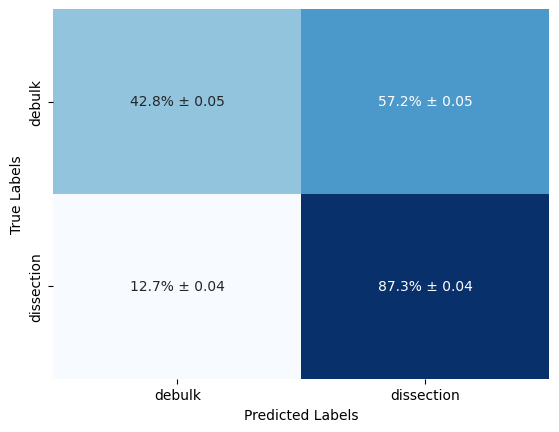

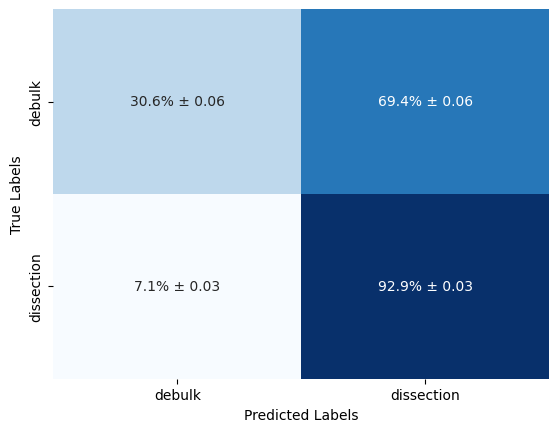

In [15]:
# saving_path = '/Users/dorotheeduvaux 1/UCL CSML/MSc Project'
saving_path = '/Users/dorotheeduvaux/PycharmProjects/SurgicalWorkflowProject'
final_results_folder = 'FinalResults'
final_results_folder = 'results'
for weight_type in ['best', 'last']:
    for folder_name_set in folder_name_sets:
        create_average_confusion_matrix(saving_path, final_results_folder, folder_name_set, weight_type)
    

### Cross-validation results - metrics

In [19]:
folder_name_sets = [
#                 ['new_network_inv_weights_refl_1fps_250',
#                 'new_nn_inv_weights_refl_1fps_250_fold2',
#                 'new_nn_inv_weights_refl_1fps_250_fold3',
#                 'new_nn_inv_weights_refl_1fps_250_fold4',
#                 'new_nn_inv_weights_refl_1fps_250_fold5'],
                # ['rLSTM_batch30_intprop_ear_1fp250_fold1',
                # 'rLSTM_batch30_intprop_ear_1fp250_fold2',
                # 'rLSTM_batch30_intprop_ear_1fp250_fold3',
                # 'rLSTM_batch30_intprop_ear_1fp250_fold4',
                # 'rLSTM_batch30_intprop_ear_1fp250_fold5'],
                # ['rLSTM_batch5_intprop_ear_1fp250_fold1',
                # 'rLSTM_batch5_intprop_ear_1fp250_fold2',
                # 'rLSTM_batch5_intprop_ear_1fp250_fold3',
                # 'rLSTM_batch5_intprop_ear_1fp250_fold4',
                # 'rLSTM_batch5_intprop_ear_1fp250_fold5']
                  ['new_network_inv_weights_refl_1fps_250_comb',
                  'new_network_inv_weights_refl_1fps_250_comb_2',
                  'new_network_inv_weights_refl_1fps_250_comb_3',
                  'new_network_inv_weights_refl_1fps_250_comb_4',
                  'new_network_inv_weights_refl_1fps_250_comb_5']
               ]
import pandas as pd

In [20]:
def create_average_metrics(saving_path, final_results_folder, folder_name_set, weight_type):
    step_matrices = numpy.zeros((5, LABEL_SIZE, 3))
    overall_matrices =  numpy.zeros((5, 1, 4))
    for i, folder_name in enumerate(folder_name_set):
        #temporal_smoothing_metrics_filename = f'temporal_smoothing_metrics_{weight_type}.csv'
        steps_metrics_filename = f'metrics_results_{weight_type}_model.csv'
        overall_results_filename = f'results_df_{weight_type}_model.csv'
        #temporal_smoothing_metrics = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, 
        #                                                          temporal_smoothing_metrics, temporal_smoothing_metrics_filename))
        #steps_df = temporal_smoothing_metrics
        steps_df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, steps_metrics_filename))
        overall_df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, overall_results_filename))
        print(os.path.join(saving_path, final_results_folder, folder_name, steps_metrics_filename))
        overall_df = pandas.read_csv(os.path.join(saving_path, final_results_folder, folder_name, overall_results_filename))
        step_matrices[i] += steps_df[['Precision', 'Recall', 'F1']].values
        # overall_df['Run'] = folder_name.replace('_', ' ')
        # overall_df = overall_df.rename(columns={'Unnamed: 0': 'Metric'})
        # overall_df = overall_df.pivot(index='Run', columns='Metric', values='Value')
        # overall_df = overall_df.reset_index()
        # overall_matrices[i] += overall_df[['Weighted average F1', 'Overall accuracy', 'Weighted average precision', 'Weighted average recall']].values
    
    steps_mean = np.mean(step_matrices, axis=0)
    steps_std_dev = np.std(step_matrices, axis=0)
    
    # step metrics
    steps_results = pd.DataFrame(steps_mean).applymap("{:.2f}".format) + " ± " + pd.DataFrame(steps_std_dev).applymap("{:.2f}".format)
    steps_results.columns = ['Precision', 'Recall', 'F1']
    if LABEL_SIZE == 5:
        labels = ['tumour debulking', 'dissection medial', 'dissection inferior', 'dissection superior', 'dissection lateral']
    elif LABEL_SIZE == 2:
        labels = ['tumour debulking', 'dissection']
    steps_results['Category'] = labels
    steps_results = steps_results[['Category', 'Precision', 'Recall', 'F1']]
    
    steps_latex_output = steps_results.to_latex(index=False, header=['Category', 'Precision', 'Recall', 'F1'])
    print(steps_latex_output)
    with open(os.path.join(saving_path, final_results_folder, f'{folder_name_set[0]}_avg_steps_metrics_{weight_type}.tex'), 'w') as f:
        f.write(steps_latex_output)
    
    # overall metrics
    overall_mean = np.mean(overall_matrices, axis=0)
    overall_std_dev = np.std(overall_matrices, axis=0)
    overall_results = pd.DataFrame(overall_mean).applymap("{:.2f}".format) + " ± " + pd.DataFrame(overall_std_dev).applymap("{:.2f}".format)
    columns = ['Weighted average F1', 'Overall accuracy', 'Weighted average precision', 'Weighted average recall']
    overall_results.columns = columns
    overall_latex_output = overall_results.to_latex(index=False, header=columns)
    print(overall_latex_output)
    with open(os.path.join(saving_path, final_results_folder, f'{folder_name_set[0]}_avg_overall_metrics_{weight_type}.tex'), 'w') as f:
        f.write(overall_latex_output)


In [21]:
# saving_path = '/Users/dorotheeduvaux 1/UCL CSML/MSc Project'
saving_path = '/Users/dorotheeduvaux/PycharmProjects/SurgicalWorkflowProject'
final_results_folder = 'FinalResults'
final_results_folder = 'results'
for weight_type in ['best', 'last']:
    for folder_name_set in folder_name_sets:
        create_average_metrics(saving_path, final_results_folder, folder_name_set, weight_type)




/Users/dorotheeduvaux/PycharmProjects/SurgicalWorkflowProject/results/new_network_inv_weights_refl_1fps_250_comb/metrics_results_best_model.csv
/Users/dorotheeduvaux/PycharmProjects/SurgicalWorkflowProject/results/new_network_inv_weights_refl_1fps_250_comb_2/metrics_results_best_model.csv
/Users/dorotheeduvaux/PycharmProjects/SurgicalWorkflowProject/results/new_network_inv_weights_refl_1fps_250_comb_3/metrics_results_best_model.csv
/Users/dorotheeduvaux/PycharmProjects/SurgicalWorkflowProject/results/new_network_inv_weights_refl_1fps_250_comb_4/metrics_results_best_model.csv
/Users/dorotheeduvaux/PycharmProjects/SurgicalWorkflowProject/results/new_network_inv_weights_refl_1fps_250_comb_5/metrics_results_best_model.csv
\begin{tabular}{llll}
\toprule
        Category &   Precision &      Recall &          F1 \\
\midrule
tumour debulking & 0.51 ± 0.07 & 0.43 ± 0.05 & 0.46 ± 0.03 \\
      dissection & 0.84 ± 0.01 & 0.87 ± 0.04 & 0.86 ± 0.02 \\
\bottomrule
\end{tabular}

\begin{tabular}{lll

### Tensorboard data

In [307]:
input_path = '/Users/dorotheeduvaux 1/UCL CSML/MSc Project/FinalResults/tensorboard_data.csv'
tensorboard_data_df = pandas.read_csv(input_path)

In [308]:
tensorboard_data_df

,Wall time,Step,Value,Run,Tag
0,1.694160e+09,0,0.709882,original_runs_adj_weights_no_dropout,training acc epoch
1,1.694160e+09,1,0.943458,original_runs_adj_weights_no_dropout,training acc epoch
2,1.694161e+09,2,0.977952,original_runs_adj_weights_no_dropout,training acc epoch
3,1.694162e+09,3,0.991850,original_runs_adj_weights_no_dropout,training acc epoch
4,1.694162e+09,4,0.997163,original_runs_adj_weights_no_dropout,training acc epoch
...,...,...,...,...,...
8929,1.694193e+09,45,0.455730,rLSTM_batch20_intprop_ear_1fp250,validation recall epoch
8930,1.694194e+09,46,0.458651,rLSTM_batch20_intprop_ear_1fp250,validation recall epoch
8931,1.694194e+09,47,0.467018,rLSTM_batch20_intprop_ear_1fp250,validation recall epoch
8932,1.694195e+09,48,0.460339,rLSTM_batch20_intprop_ear_1fp250,validation recall epoch


In [320]:
runs = [
        # 'original_run_no_weights_no_dropout',
        # 'original_runs_inv_weights_no_dropout',
        # 'new_network_no_weights_1fps_250',
        # 'new_network_inv_weights_1fps_250'
        # 'new_network_no_weights_refl_1fps_250',
        # # # 'new_network_adj_weights_1fps_250',
        # 'new_network_inv_weights_refl_1fps_250',
        # 'rLSTM_batch30_intprop_ear_1fp250_fold1',
        # 'rLSTM_batch30_intprop_ear_1fp250_fold2',
        # 'rLSTM_batch30_intprop_ear_1fp250_fold3',
        # 'rLSTM_batch30_intprop_ear_1fp250_fold4',
        # 'rLSTM_batch30_intprop_ear_1fp250_fold5',
    # 'rLSTM_batch5_intprop_ear_1fp250_fold1',
    #     'rLSTM_batch20_intprop_ear_1fp250',
    # 'rLSTM_batch30_intprop_ear_1fp250_fold1',
    # 'rLSTM_batch40_intprop_ear_1fp250',
    # 'rLSTM_batch50_intprop_ear_1fp250',
    # 'rLSTM_batch100_intprop_ear_1fp250',
    'rLSTM_batch30_intprop_ear_1fp250_fold1',
    
       ]
label = 'single_LSTM' #'new_network' #orig_run_no_dropout'
run_map = {
    'original_run_no_weights_no_dropout':'no weights',
    'original_runs_inv_weights_no_dropout':'inverse proportional weights',
    'original_runs_adj_weights_no_dropout':'adjusted weights',
    'new_network_no_weights_1fps_250':'no weights',
    'new_network_inv_weights_1fps_250':'inverse proportional weights',
    'new_network_adj_weights_1fps_250':'adjusted weights',
            'new_network_no_weights_refl_1fps_250': 'no weights',
        'new_network_inv_weights_refl_1fps_250':'inverse proportional weights',
        'rLSTM_batch5_intprop_ear_1fp250_fold1': 'batch size 5',
        'rLSTM_batch20_intprop_ear_1fp250': 'batch size 20',	
        'rLSTM_batch30_intprop_ear_1fp250_fold1': 'fold1',
        'rLSTM_batch40_intprop_ear_1fp250': 'batch size 40',
        'rLSTM_batch50_intprop_ear_1fp250': 'batch size 50',
        'rLSTM_batch100_intprop_ear_1fp250': 'batch size 100',
            # 'rLSTM_batch30_intprop_ear_1fp250_fold1': 'fold1',
        'rLSTM_batch30_intprop_ear_1fp250_fold2': 'fold2',
        'rLSTM_batch30_intprop_ear_1fp250_fold3': 'fold3',
        'rLSTM_batch30_intprop_ear_1fp250_fold4': 'fold4',
        'rLSTM_batch30_intprop_ear_1fp250_fold5': 'fold5',
}
tags = ['training loss epoch ', 'training acc epoch', 'validation loss epoch ', 'validation f1 epoch']
tag_map = {'training loss epoch ': 'Training loss', 
           'training acc epoch': 'Training accuracy',
           'validation loss epoch ': 'Validation loss',
           'validation f1 epoch': 'Validation F1'
          }

tensorboard_data_df['epoch'] = tensorboard_data_df['Step'] + 1
tensorboard_data_df['epoch'] = tensorboard_data_df['epoch'].astype(int)
results_df = tensorboard_data_df[tensorboard_data_df['Run'].isin(runs)] # & tensorboard_data_df['Tag'].isin(tags)]
results_df = results_df.sort_values(by=['Run', 'epoch'])

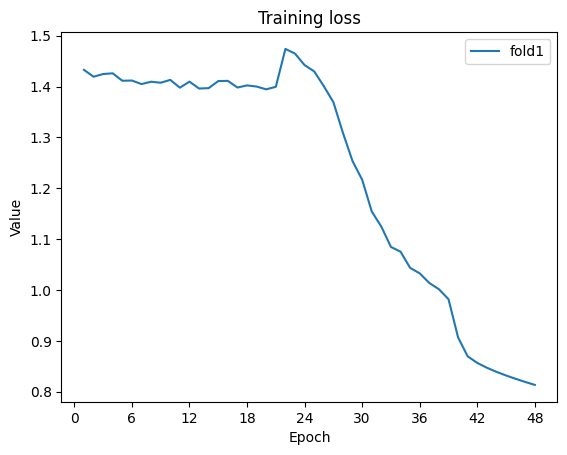

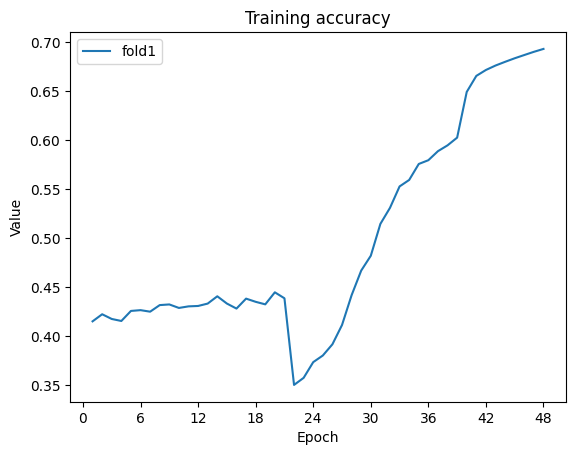

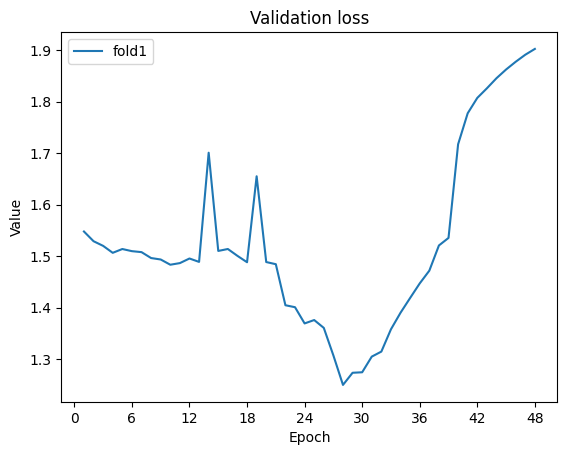

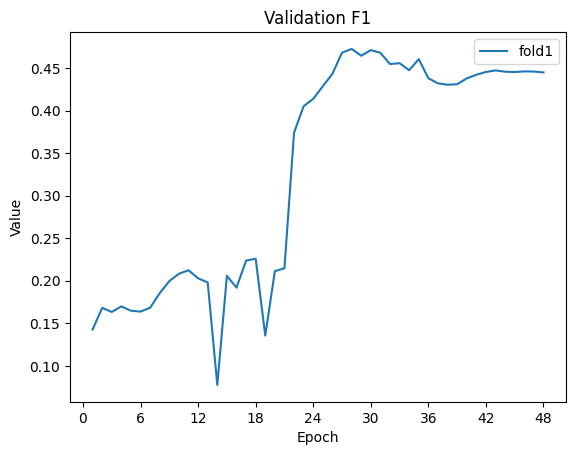

In [321]:
from matplotlib.ticker import MaxNLocator

tag_ylim_max_map = {
          # 'training loss epoch ': 0.65, 
          #  'training acc epoch': 1,
           'validation loss epoch ': 3.5, # 4.0,
           'validation f1 epoch': 0.55
          }

tag_ylim_min_map = {
           # 'training loss epoch ': 0, 
           # 'training acc epoch': 0.7,
           'validation loss epoch ': 1.5, # 1.2,
           'validation f1 epoch': 0.1, #0.3
          }

for tag in tags:
    fig, ax = plt.subplots()
    data = results_df[results_df['Tag'] == tag]
    
    runs = data['Run'].unique()   
    # for run in runs: 
    #     run_data = data[data['Run'] == run]
    #     #run_data = run_data[['epoch','Value']]
    #     print(run_data)
    #     run_data = run_data.sort_values(by='epoch', ascending=True)
    #     print(run_data)
    #     print('plotting')
    #     ax.plot(run_data['epoch'], run_data['Value'], label=f'{run_map[run]}')
    for run in runs: 
        run_data = data[data['Run'] == run]
        # Group by 'epoch' and keep only the row with the max 'Wall time' for each group
        idx = run_data.groupby('epoch')['Wall time'].idxmax()  # replace 'Wall time' with your actual column name
        run_data = run_data.loc[idx]
        
        run_data = run_data.sort_values(by='epoch', ascending=True)
        ax.plot(run_data['epoch'], run_data['Value'], label=f'{run_map[run]}')
        
    # y_min = tag_ylim_min_map[tag] if tag in tag_ylim_min_map else None
    # y_max = tag_ylim_max_map[tag] if tag in tag_ylim_max_map else None
    # if y_min is not None and y_max is not None:
    #     ax.set_ylim(tag_ylim_min_map[tag], tag_ylim_max_map[tag])
    # Set the title dynamically based on the tag
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title(f'{tag_map[tag]}')
    plt.legend()

    
    # Display the plot
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    tag = tag.replace(' ', '_')
    plt.savefig(os.path.join(saving_path, final_results_folder, f'{label}_{tag}.png'))

